In [2]:
from importlib import reload
import flymovie as fm
from flymovie.simnuc import Sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from importlib import reload
from sklearn.manifold import TSNE
import scipy.ndimage as ndi
import skimage as ski
import mixmod
import scipy.stats as stats
%load_ext autoreload
%autoreload 2

In [9]:
im = fm.read_czi('/Volumes/stad3/2022-03-21/good/26983-1-1-em2-03.czi', swapaxes=False)
im = im[20:30]

In [18]:
fm.viewer(im,10)

interactive(children=(Dropdown(description='Color', index=2, options=('Greens', 'viridis', 'cividis', 'gray', …

In [25]:
sm = ndi.gaussian_filter(im, 4)
mask = np.where(sm > 4000, True, False)
fm.viewer(np.where(mask, im, 0))

interactive(children=(Dropdown(description='Color', index=2, options=('Greens', 'viridis', 'cividis', 'gray', …

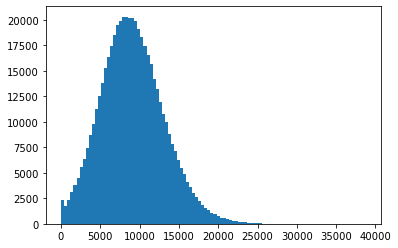

In [27]:
vals = im[mask > 0]
plt.hist(vals, bins=100);

In [50]:
mixture = mixmod.MixtureModel([stats.gamma, stats.norm], params=[{'a':1, 'scale':10_000},{'scale':10_000}])
data = vals.copy()
mixture.fit(data)
mixture

MixtureModel(components=['gamma', 'norm'],
             params=[{'a': 3.409513057630324, 'scale': 2469.24384719221}, {'loc': 9373.11843996652, 'scale': 3695.281339202529}],
             params_fix=[{}, {}],
             weights=[0.29441127111482895, 0.7055887288851711],
             name='mixture')

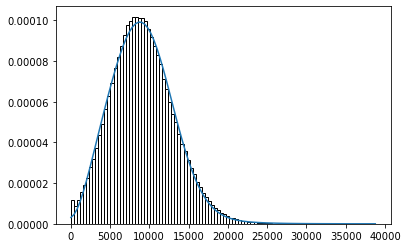

In [51]:

x = np.linspace(data.min(), data.max(), 100)
y = mixture.pdf(x, component='all')
bins=100
plt.hist(data, bins=bins, density=True, facecolor='white', edgecolor='black')
plt.plot(x, y[0] + y[1], label='component 0', color='C0')
#plt.plot(x, y[1], label='component 0', color='C0')

In [31]:
?stats.gamma

Signature:       stats.gamma(*args, **kwds)
Type:            gamma_gen
String form:     <scipy.stats._continuous_distns.gamma_gen object at 0x1349a9700>
File:            ~/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A gamma continuous random variable.

As an instance of the `rv_continuous` class, `gamma` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(a, loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, a, loc=0, scale=1)
    Probability density function.
logpdf(x, a, loc=0, scale=1)
    Log of the probability density function.
cdf(x, a, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, a, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, a, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accur